# import libraries and load data

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from definitions import TRAINSET_PATH,TESTSET_PATH,SUBMISSION_PATH
%matplotlib inline
pd.set_option("max.rows",999)
import missingno as msno

In [30]:
def load_data():
    df_train=pd.read_csv(TRAINSET_PATH)
    df_test=pd.read_csv(TESTSET_PATH)
    df_sub=pd.read_csv(SUBMISSION_PATH)

    return df_train,df_test,df_sub

In [31]:
df_train,df_test,df_sub=load_data()

# First look in the data

In [32]:
for df in [df_train,df_test,df_sub]:
    print("\n")
    print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114321 entries, 0 to 114320
Columns: 133 entries, ID to v131
dtypes: float64(108), int64(6), object(19)
memory usage: 116.0+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114393 entries, 0 to 114392
Columns: 132 entries, ID to v131
dtypes: float64(108), int64(5), object(19)
memory usage: 115.2+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114393 entries, 0 to 114392
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             114393 non-null  int64  
 1   PredictedProb  114393 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.7 MB
None


In [33]:
df_train.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,6.085711,2.866830,11.636387,1.355013,8.571429,3.670350,0.106720,0.148883,18.869283,7.730923,XDX,-1.716131e-08,C,0.139412,1.720818,3.393503,0.590122,8.880867,C,A,1.083033,1.010829,7.270147,8.375452,11.326592,0.454546,0,4.012088,7.711453,7.653429,12.707581,2.015505,10.498338,9.848672,0.113561,C,12.171733,8.086643,0.899420,7.277792,G,16.747968,0.037096,1.299638,DI,3.971118,0.529802,10.890984,1.588448,15.858152,1,0.153461,6.363189,18.303925,C,9.314079,15.231789,17.142857,11.784549,F,1,1.614988,B,D,2.230940,7.292418,8.571429,E,3.000000,7.528326,8.861647,0.649820,1.299638,1.707317,0.866426,9.551836,3.321300,0.095678,0.905342,A,0.442252,5.814018,3.517720,0.462019,7.436824,5.454545,8.877414,1.191337,19.470199,8.389237,2.757375,4.374296,1.574039,0.007294,12.579184,E,2.382692,3.930922,B,0.433213,O,NaN,15.634907,2.857144,1.951220,6.592012,5.909091,-6.297423e-07,1.059603,0.803572,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,NaN,1.312910,NaN,6.507647,NaN,11.636386,NaN,NaN,NaN,NaN,NaN,NaN,6.763110,GUV,NaN,C,3.056144,NaN,NaN,NaN,NaN,C,A,NaN,NaN,3.615077,NaN,14.579479,NaN,0,NaN,14.305766,NaN,NaN,NaN,NaN,NaN,2.449959,E,NaN,NaN,1.379210,NaN,G,NaN,1.129469,NaN,DY,NaN,NaN,NaN,NaN,NaN,2,2.544736,NaN,NaN,A,NaN,NaN,NaN,12.053353,F,2,NaN,B,D,NaN,NaN,NaN,D,NaN,7.277655,3.430691,NaN,NaN,NaN,NaN,9.848004,NaN,2.678584,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,8.303967,NaN,NaN,NaN,NaN,NaN,NaN,1.505335,NaN,B,1.825361,4.247858,A,NaN,U,G,10.308044,NaN,NaN,10.595357,NaN,NaN,NaN,NaN,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,6.384670,2.505589,9.603542,1.984127,5.882353,3.170847,0.244541,0.144258,17.952332,5.245035,FQ,-2.785053e-07,E,0.113997,2.244897,5.306122,0.836005,7.499999,NaN,A,1.454082,1.734693,4.043864,7.959184,12.730517,0.259740,0,7.378964,13.077201,6.173469,12.346939,2.926830,8.897561,5.343819,0.126035,C,12.711328,6.836734,0.604504,9.637627,F,15.102041,0.085573,0.765305,AS,4.030613,4.277456,9.105481,2.151361,16.075602,1,0.123643,5.517949,16.377205,A,8.367347,11.040463,5.882353,8.460654,B,3,2.413618,B,B,1.963971,5.918368,11.764705,E,3.333334,10.194433,8.266200,1.530611,1.530613,2.429906,1.071429,8.447465,3.367346,0.111388,0.811447,G,0.271480,5.156559,4.214944,0.309657,5.663265,5.974026,11.588858,0.841837,15.491329,5.879353,3.292788,5.924457,1.668401,0.008275,11.670572,C,1.375753,1.184211,B,3.367348,S,NaN,11.205561,12.941177,3.129253,3.478911,6.233767,-2.792745e-07,2.138728,2.238806,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,16.347483,9.646653,3.903302,14.094723,1.945044,5.517242,3.610789,1.224114,0.231630,18.376407,7.517125,ACUE,-4.805344e-07,D,0.148843,1.308269,2.303640,8.926662,8.874521,C,B,1.587644,1.666667,8.703550,8.898468,11.302795,0.433735,0,0.287322,11.523045,7.931035,12.935823,1.470878,12.708574,9.670823,0.108387,C,12.194855,8.591954,3.329176,4.780357,H,16.621695,0.139721,1.178161,BW,3.965517,1.732102,11.777912,1.229246,15.927390,1,0.140260,6.292979,17.011645,A,9.703065,18.568129,9.425288,13.594728,F,2,2.272541,B,D,2.188198,8.213602,13.448277,B,1.947261,4.797873,13.315819,1.681034,1.379310,1.587045,1.242817,10.

In [34]:
df_test.head()

,ID,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,0,1.375465e+00,11.361141,C,4.200778,6.57700,2.081784,1.784386,0.011094,9.523810,1.312911,16.851853,6.961173,3.107462,12.230137,1.773050,2.857142,3.493816,0.096826,0.225481,17.910227,7.437806,AFPB,9.558310e-07,E,0.069180,0.954152,4.386616,0.573017,6.988848,NaN,A,1.115242,2.081784,5.228503,8.178438,12.183225,8.333339e-01,0,2.842768e+00,11.754576,6.765800,10.855019,1.296297,10.613377,9.417172,0.100480,J,12.774528,7.509293,0.118847,8.590755,C,17.021277,0.044313,1.338291,AF,2.602230,2.919712e-01,9.038609,0.817843,14.911512,1,0.091466,5.967949,15.611474,A,8.029739,15.912409,8.571429,11.222210,F,1,1.929013,B,D,2.146860,6.171004,15.714287,Q,1.904761,8.918731,8.750729,2.453532,0.892192,1.860465,0.892193,7.904968,1.784387,0.105298,0.988980,B,0.658269,4.929298,2.992365,0.759955,5.947955,4.999999,10.013503,0.817844,19.708030,4.186787,1.873945,4.129022,1.701894,0.004535,11.688117,B,1.502480,2.121710,A,3.568773,U,NaN,12.246698,11.428572,1.276596,4.777902,5.833334,-9.974950e-07,1.459854,3.267328,7.619048,1.815241,1.112270e-07,AF,1.292368,3.903345,1.485925,0,2.333334,1.428572e+00
1,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,1.291029,NaN,6.618289,NaN,10.760796,NaN,NaN,NaN,NaN,NaN,NaN,5.895192,FOG,NaN,D,NaN,NaN,NaN,NaN,NaN,A,A,NaN,NaN,8.387431,NaN,NaN,NaN,4,NaN,6.737574,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,1.027070,NaN,A,NaN,NaN,NaN,DI,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN,F,5,NaN,B,D,NaN,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,NaN,NaN,B,NaN,E,NaN,16.284938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I,NaN,NaN,NaN,0,NaN,NaN
2,2,-4.903407e-07,8.201529,C,4.544371,6.55010,1.558442,2.467532,0.007164,7.142858,1.575492,15.142858,6.894249,1.899789,13.306189,1.302083,3.333334,3.177414,0.070676,0.172391,17.537549,8.253452,HXZ,-2.137218e-07,B,0.059620,2.857142,2.207792,0.327134,8.311689,C,A,0.974026,1.558442,7.958990,8.311689,12.195123,-5.249334e-07,0,6.707352e+00,7.701325,6.883118,12.077923,3.428570,10.215687,7.908401,0.082194,I,12.770831,7.792207,0.840731,9.885153,A,15.000000,0.020126,0.779222,DO,5.454544,-8.476044e-07,9.452010,2.857142,15.561143,1,0.083718,5.633655,15.778656,C,9.090908,13.200000,6.666666,7.860585,F,1,1.488096,B,D,1.910292,5.714285,16.666667,C,1.428572,8.952301,8.744891,1.948051,0.779221,1.860465,0.779221,5.886226,5.714285,0.043851,0.918734,C,0.552642,4.350983,3.163664,0.604966,6.233767,12.631578,10.214574,0.952380,19.799999,6.535555,0.762963,4.917534,1.981859,0.002794,11.747048,D,1.188768,2.088817,A,3.116883,Q,AJ,15.622710,13.333334,3.750001,4.740574,12.631580,4.910660e-08,0.600000,2.500001,5.714286,1.970928,1.412265e-02,AV,1.128724,5.844156,1.475892,0,1.263157,-6.380022e-07
3,7,2.661870e+00,3.041241,C,1.657216,9.77308,2.078337,1.430855,1.252157,7.959596,1.575493,14.424357,6.856236,5.086604,10.397026,2.803497,7.302904,1.121984,0.608524,0.476554,15.285588,5.539484,AGMU,5.863396e-07,E,1.779993,1.406875,1.350919,5.347444,6.474820,E,A,2.362111,3.852918,6.223849,6.634692,13.741929,2.011174e+00,0,8.248888e-07,10.444974,6.059153,13.189448,1.826832,7.635934,12.850679,1.504218,I,16.791675,7.801759,0.946373,8.578365,A,15.382717,1.351259,3.812951,CN,4.356514,1.953542e+01,10.425885,1.128431,10.935236,1,1.809689,2.181748,12.366115,B,8.401279,17.677120,13.195021,14.124303,F,1,3.905010,B,D,0.644581,6.370902,11.203320,C,3.555555,6.284919,3.264427,3.237409,4.220623,6.000001,1.306954,13.037068,0.431654,2.035947,1.495102,B,0.775499,3.

In [35]:
df_sub.head()

,ID,PredictedProb
0,0,0.5
1,1,0.5
2,2,0.5
3,7,0.5
4,10,0.5


# Missing Data

In [36]:
def get_missing_data(data):
    total=data.isnull().sum()
    percent=(data.isnull().sum()/data.isnull().count()*100)

    df=pd.concat([total,percent],axis=1,keys=["Total","Percent"])
    types=[]
    for col in data.columns:
        dtype=str(data[col].dtype)
        types.append(dtype)
    df["Types"]=types
    return df

In [39]:
get_missing_data(df_train).sort_values(by="Percent",ascending=False).head(10)

,Total,Percent,Types
v30,60110,52.580016,object
v113,55304,48.376064,object
v102,51316,44.887641,float64
v85,50682,44.333062,float64
v119,50680,44.331313,float64
v51,50678,44.329563,float64
v123,50678,44.329563,float64
v23,50675,44.326939,float64
v69,49895,43.644650,float64
v78,49895,43.644650,float64


In [55]:
get_missing_data(df_test).sort_values(by="Percent",ascending=False).head(10)

,Total,Percent,Types
v30,60342,52.749731,object
v113,55358,48.392821,object
v102,51362,44.899601,float64
v85,50717,44.335755,float64
v123,50717,44.335755,float64
v51,50717,44.335755,float64
v119,50716,44.334881,float64
v23,50713,44.332258,float64
v16,49944,43.660014,float64
v115,49944,43.660014,float64


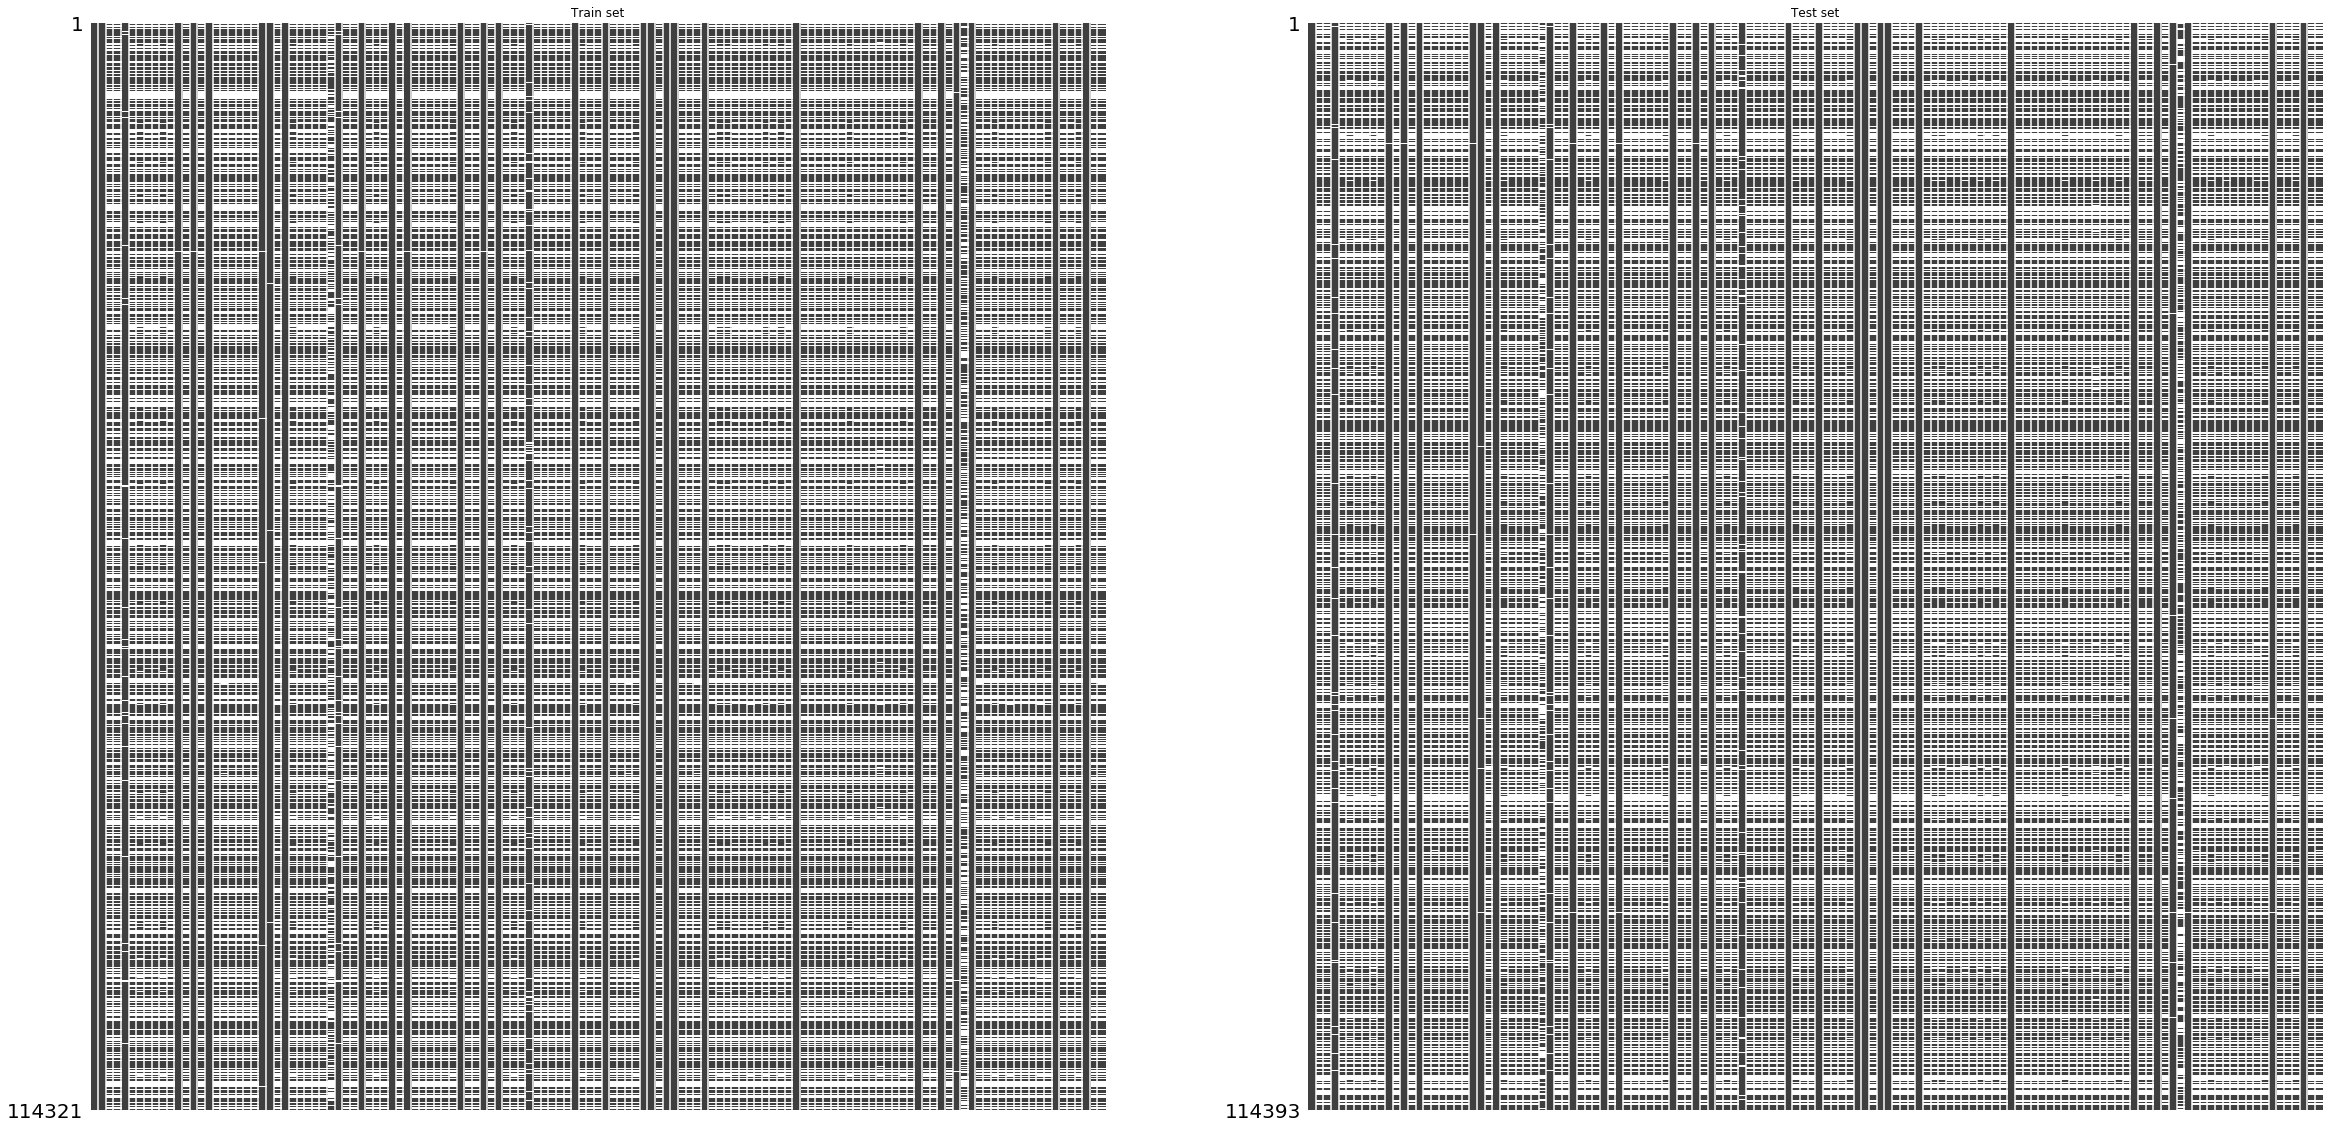

In [54]:
fig,(sub1,sub2)=plt.subplots(1,2,figsize=(40,20))
msno.matrix(df_train,ax=sub1)
msno.matrix(df_test,ax=sub2)
sub1.set_title("Train set")
sub2.set_title("Test set");